# Titanic Disaster

![Titanic realna fotka](https://raw.githubusercontent.com/Masterx-AI/Project_Titanic_Survival_Prediction_/main/titanic.jpg)

originalny dataset z Kaggle.com je dostupny tu: https://www.kaggle.com/competitions/titanic

## Data Reorganization

1. chceme spojit dataset `test.csv` s datasetom `train.csv`
2. pozriet sa na duplikaty
3. rozdelit stlpec `Name` na `firstname` a `lastname`

### 1. Spojenie datasetov

In [1]:
from pathlib import Path
import pandas as pd

path = Path('data/titanic')

In [2]:
df_train = pd.read_csv(path / 'train.csv', index_col='PassengerId')
df_test = pd.read_csv(path / 'test.csv', index_col='PassengerId')

zobrazime si rozmery jedneho aj druheho dataset-u pomocou vlastnosti `.shape`:

In [3]:
df_train.shape, df_test.shape

((891, 11), (418, 10))

ked sa pozrieme na ne blizsie, tak vieme, ze:

* dataset `train` ma `891` riadkov a `11` stlpcov
* dataset `test` ma `418` riadkov a `10` stlpcov

po spojeni by sme mali v sucte `891 + 418 = 1309` riadkov. ale mame problem so stlpcami - su rozdielne. nemozeme spojit dva datasety, ktore maju rozdielny pocet stlpcov (iba ak by sme niektore vynechali alebo by se vytvorili prazdny stlpec).

pozrime sa teda na to, aky stlpec nam chyba v dataset `test`:

In [4]:
df_train.columns, df_test.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

a je to jasne. chyba nam hned prvy stlpec `Survived`. hodnoty tohto stlpca sa totiz nachadzaju v datasete `gender_submission.csv`. takze ho najprv nacitame:

In [5]:
df_survival = pd.read_csv(path / 'gender_submission.csv', index_col='PassengerId')

spojenie teda bude vyzerat takto:

* najprv spojime datasety `gender_submission.csv` a `test.csv` na zaklade stlpca `PassengerId`
* potom spojime datasety `train.csv` s vyslednym datasetom, ktory vznikol spojenim `gender_submission.csv` a `test.csv` rovnako na zaklade stlpca `PassengerId`

In [6]:
# spojenie datasetov gender_submission.csv a test.csv
df_merged = df_test.merge(df_survival, on='PassengerId', how='left')

In [7]:
# spojenie dataset train.csv a vysledneho datasetu, ktory vznikol v predchadzajucom kroku
# df_merged.merge(df_train, how='outer')
passengers = pd.concat( [df_train, df_merged] )

In [8]:
passengers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [9]:
passengers['lastname'] = passengers['Name'].str.split(',', expand=True)[0]
passengers['firstname'] = passengers['Name'].str.split(',', expand=True)[1]

In [10]:
df = passengers

### 2. Príprava a čistenie datasetu

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   1309 non-null   int64  
 1   Pclass     1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1046 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1308 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1307 non-null   object 
 11  lastname   1309 non-null   object 
 12  firstname  1309 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 143.2+ KB


## Otazky ohladom Titanku

### Základné informácie

1. Koľko bolo cestujúcich?
2. Koľko bolo na palube žien a koľko mužov?
3. Koľko detí bolo na Titaniku? (do 18 rokov)
4. Najstarší a najmladší pasažier? Najmladšia a najstaršia žena/muž?
5. Aký bol priemerný vek pasažierov?
6. Koľko bolo na palube Jackov? A koľko tam bolo Rose?
7. Koľko bola priemerná cena lístka pre príslušnú triedu pasažierov?
8. Aký bol zisk z predaja lístkov?


### Nalodenie

1. Koľko prístavov na ceste stihol Titanic navštíviť?
2. Koľko pasažierov nastúpilo v jednotlivých prístavoch?
3. V ktorom prístave nastúpilo najviac pasažierov?
4. V ktorom prístave nastúpilo najviac detí?

### O preživších

1. Koľko pasažierov prežilo katastrofu?
1. Koľko pasažierov prežilo z jednotlivých tried?
2. Koľko mužov a žien prežilo?
3. Čo všetko malo vplyv na to, že pasažier prežil? (vek, pohlavie, vrstva, na ktorej bol palube, ...)

## Riešenia

### 1. Koľko detí bolo na Titaniku? (do 18 rokov)


In [11]:
filter_is_kid = df['Age'] < 18
len(df.loc[ filter_is_kid, : ])

154

### 2. Koľko žien prežilo a koľko mužov prežilo? A koľko mužov a koľko žien tam vlastne bolo?


In [12]:
# kolko muzov
filter_is_male = df['Sex'] == 'male'
len(df.loc[ filter_is_male, : ])

843

In [13]:
# kolko bolo zien
df.loc[ ~filter_is_male, 'Sex' ].count()

466

In [14]:
# kolko prezilo muzov
filter_has_survived = df['Survived'] == 1
df.loc[ filter_is_male & filter_has_survived, 'Sex' ].count()

109

In [15]:
# kolko prezilo zien
df.loc[ ~filter_is_male & filter_has_survived, 'Sex' ].count()

385

In [72]:
# group by - kolko muzov a kolko zien
df.groupby('Sex')['Sex'].count()

Sex
female    466
male      843
Name: Sex, dtype: int64

<Axes: title={'center': 'Počet mužov a žien'}, xlabel='pohlavie', ylabel='počet'>

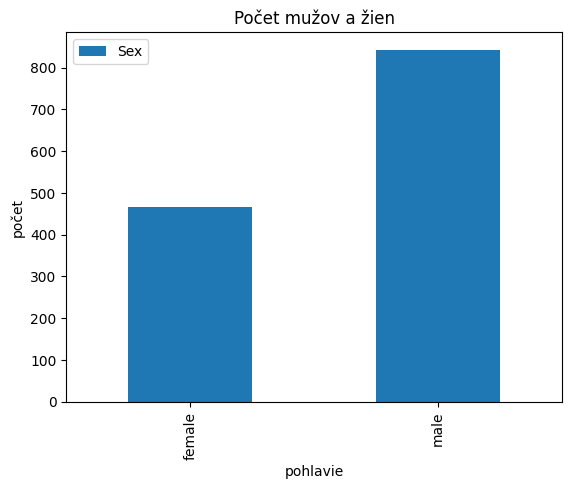

In [141]:
df.groupby('Sex')['Sex'].count().plot(
    kind='bar', 
    title='Počet mužov a žien',
    xlabel='pohlavie',
    ylabel='počet',
    legend=True
)

In [17]:
# 
df.groupby(['Sex', 'Survived'])['Sex'].count()
df[ filter_has_survived ].groupby('Sex')['Sex'].count()

Sex
female    385
male      109
Name: Sex, dtype: int64

### 3. Najstarší a najmladší pasažier? Najmladšia a najstaršia žena/muž?

In [18]:
# filtre pre max a min vek
filter_max_age = df['Age'] == df['Age'].max()
filter_min_age = df['Age'] == df['Age'].min()

In [19]:
# najmladsi pasazier
df.loc[ filter_min_age, ('Name', 'Age', 'Sex') ]

,Name,Age,Sex
PassengerId,,,
1246,"Dean, Miss. Elizabeth Gladys Millvina""""",0.17,female


In [20]:
# najtarsi pasazier
df.loc [ filter_max_age, ('Name', 'Age', 'Sex') ]

,Name,Age,Sex
PassengerId,,,
631,"Barkworth, Mr. Algernon Henry Wilson",80.0,male


In [21]:
# najmladsia zena
df.loc[ ~filter_is_male, ('Name', 'Age', 'Sex') ].nsmallest(1, 'Age')

,Name,Age,Sex
PassengerId,,,
1246,"Dean, Miss. Elizabeth Gladys Millvina""""",0.17,female


In [22]:
# najmladsi muz
df.loc[ filter_is_male, ('Name', 'Age', 'Sex') ].nsmallest(1, 'Age')

,Name,Age,Sex
PassengerId,,,
1093,"Danbom, Master. Gilbert Sigvard Emanuel",0.33,male


In [23]:
# najstarsia zena
df.loc[ ~filter_is_male, ('Name', 'Age', 'Sex') ].nlargest(1, 'Age')

,Name,Age,Sex
PassengerId,,,
988,"Cavendish, Mrs. Tyrell William (Julia Florence...",76.0,female


In [24]:
# najstarsi muz
df.loc[ filter_is_male, ('Name', 'Age', 'Sex') ].nlargest(1, 'Age')

,Name,Age,Sex
PassengerId,,,
631,"Barkworth, Mr. Algernon Henry Wilson",80.0,male


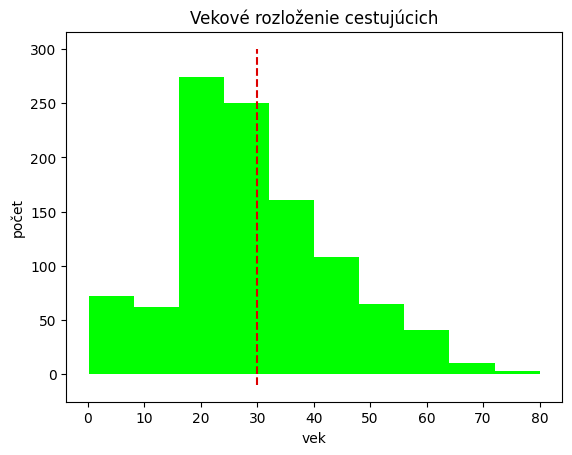

In [147]:
avg_age = df['Age'].mean()
df['Age'].plot(
    kind='hist', 
    title='Vekové rozloženie cestujúcich',
    ylabel='počet',
    xlabel='vek',
    color='#00ff00',
).vlines(avg_age, -10, 300, colors='#dd0000', linestyles='dashed')

<Axes: >

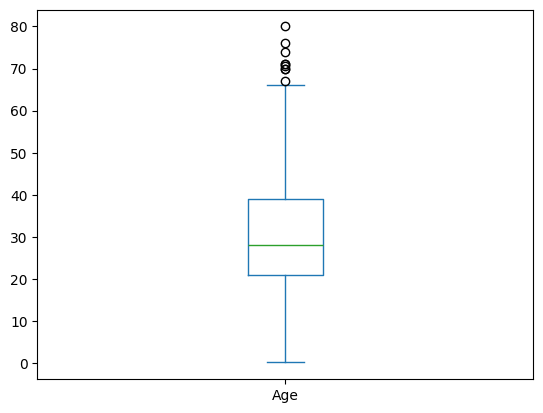

In [137]:
# iny pohlad na vek pasazierov
df['Age'].plot(
    kind='box'
)

### 4. Koľko pasažierov prežilo z jednotlivých tried?

In [25]:
# old way
filter_1st_class = df['Pclass'] == 1
len(df.loc[ filter_has_survived & filter_1st_class ])

186

In [26]:
# group by way
df.loc[ filter_has_survived, : ].groupby(['Pclass', 'Sex'])['Survived'].count()

Pclass  Sex   
1       female    141
        male       45
2       female    100
        male       17
3       female    144
        male       47
Name: Survived, dtype: int64

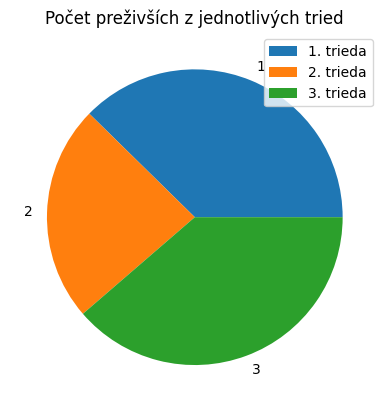

In [116]:
df.loc[ filter_has_survived, : ].groupby(['Pclass'])['Survived'].count().plot(
    kind='pie', 
    legend=True,
    title='Počet preživších z jednotlivých tried',
    ylabel='',
).legend(['1. trieda', '2. trieda', '3. trieda'])

### 5. Koľko bolo na palube Jackov? A koľko tam bolo Rose?

In [34]:
# bol tam jack?
filter_is_jack = df['firstname'].str.contains('Jack')
df.loc[ filter_is_male & filter_is_jack, ('Name', 'Age') ]

,Name,Age
PassengerId,,
767,"Brewe, Dr. Arthur Jackson",NaN


In [33]:
# bola tam rose?
filter_is_rose = df['firstname'].str.contains('Rose')
df.loc[ ~filter_is_male & filter_is_rose, ('Name', 'Age') ]

,Name,Age
PassengerId,,
856,"Aks, Mrs. Sam (Leah Rosen)",18.0


### 6. Koľko bola priemerná cena lístka pre príslušnú triedu pasažierov?

In [36]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

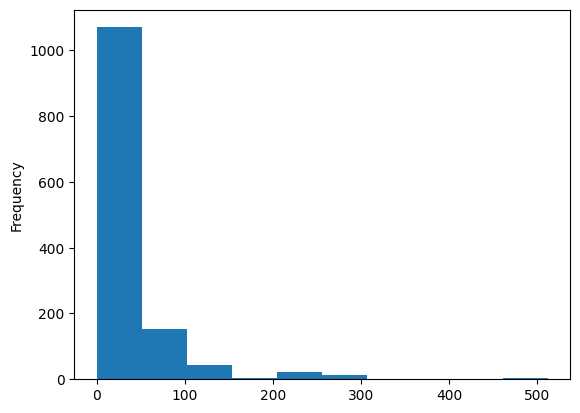

In [103]:
df['Fare'].plot(kind='hist')

<Axes: title={'center': 'Cena lístka'}, ylabel='cena'>

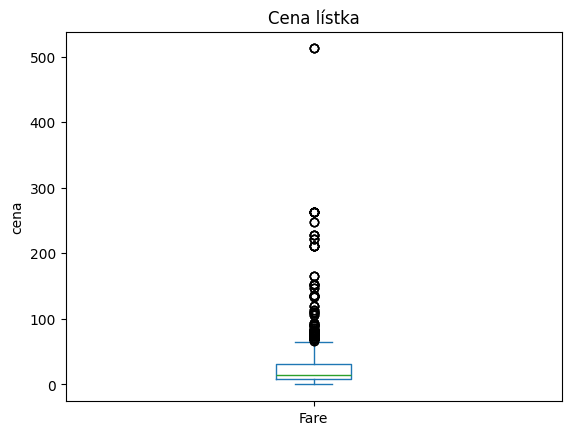

In [95]:
df['Fare'].plot(
    kind='box',
    title='Cena lístka',
    ylabel='cena'
)

### 7. Koľko pasažierov nastúpilo v jednotlivých prístavoch?

In [39]:
df.groupby(['Embarked', 'Sex'])['Embarked'].count()

Embarked  Sex   
C         female    113
          male      157
Q         female     60
          male       63
S         female    291
          male      623
Name: Embarked, dtype: int64

### 8. Čo všetko malo vplyv na to, že pasažier prežil? (vek, pohlavie, vrstva, na ktorej bol palube, ...)

In [56]:
df.loc[ filter_has_survived ].groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    36.0
        male      36.0
2       female    28.0
        male       3.0
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [60]:
df.sort_values('Age')['Age']

PassengerId
1246    0.17
1093    0.33
804     0.42
756     0.67
470     0.75
        ... 
1300     NaN
1302     NaN
1305     NaN
1308     NaN
1309     NaN
Name: Age, Length: 1309, dtype: float64

In [71]:
df.groupby(['lastname', 'Sex'])['lastname'].count().sort_values(ascending=False).head(10)

lastname   Sex   
Andersson  female    7
Asplund    male      6
Sage       male      6
Davies     male      6
Williams   male      5
Goodwin    male      5
Sage       female    5
Panula     male      5
Rice       male      5
Brown      female    5
Name: lastname, dtype: int64

### 10. Aký bol zisk z predaja lístkov?

In [138]:
# solution
df['Fare'].sum()

43550.4869